In [176]:
#import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
import seaborn as sns
!pip install pandas==0.20.0
pd.isna = pd.isnull

In [177]:
#Load feature list
features = list()
with open("/content/drive/My Drive/UCI-HAR Dataset /features.txt") as f:
    for line in f:
        features.append(line.split()[1])

In [4]:
#Load training dataset
train_df = pd.read_csv('/content/drive/My Drive/UCI-HAR Dataset /train/X_train.txt', delim_whitespace = True, names=features)

train_df["subject_id"] = pd.read_csv('/content/drive/My Drive/UCI-HAR Dataset /train/subject_train.txt', header = None, squeeze = True) #squeeze = True will 
#return data in pandas series format

train_df["activity"] = pd.read_csv('/content/drive/My Drive/UCI-HAR Dataset /train/y_train.txt', header = None, squeeze = True)

activity = pd.read_csv("/content/drive/My Drive/UCI-HAR Dataset /train/y_train.txt", header = None, squeeze = True)


#mapping activity to activity name
label_name = activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LAYING"})

train_df["activity_name"] = label_name

train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity,activity_name
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [144]:
train_df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085,3.643362
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143,1.744802
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000,2.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000,4.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000,6.000000


In [5]:
print("Size of Train data = {}".format(train_df.shape))

Size of Train data = (7352, 564)


In [6]:
# Checking for nan values
print("Number of NaN values in train data is "+str(train_df.isnull().sum().sum()))
# Checking for duplicate values
print("Number of duplicate values in train data is "+str(sum(train_df.duplicated())))

Number of NaN values in train data is 0
Number of duplicate values in train data is 0


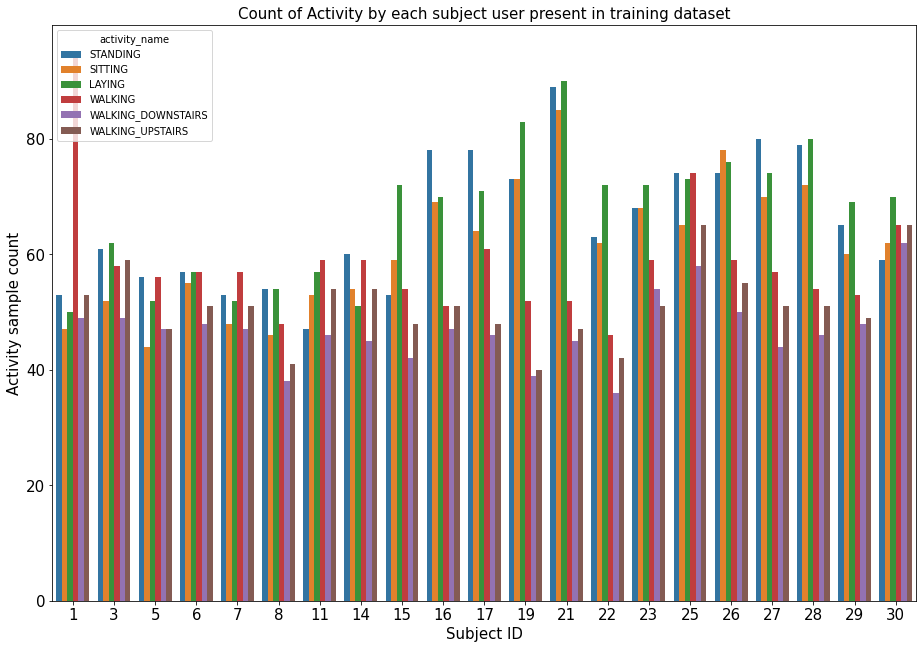

<Figure size 432x288 with 0 Axes>

In [151]:
#figure for subject count activities
fig = plt.figure(figsize = (12, 8))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of Activity by each subject user present in training dataset", fontsize = 15)
plt.tick_params(labelsize = 15)
x =sns.countplot(x = "subject_id", hue = "activity_name", data = train_df)
plt.xlabel("Subject ID", fontsize = 15)
plt.ylabel("Activity sample count", fontsize = 15)
plt.show()
plt.savefig('User Activity Count.png')

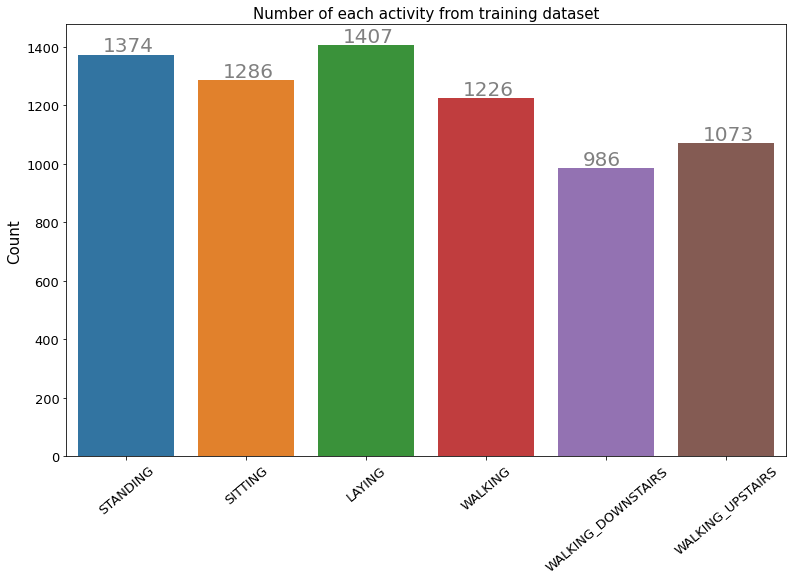

<Figure size 432x288 with 0 Axes>

In [140]:
#plot figure for count of per activity sample 
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Number of each activity from training dataset", fontsize = 15)
plt.tick_params(labelsize = 10)
sns.countplot(x = "activity_name", data = train_df)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+10, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 13)
plt.xticks(rotation = 40)
plt.show()
plt.savefig('Activity_Count.png')

In [13]:
# Mapping table for classes
labels = {1:'WALKING', 2:'WALKING UPSTAIRS', 3:'WALKING DOWNSTAIRS',
          4:'SITTING', 5:'STANDING', 6:'LAYING'}


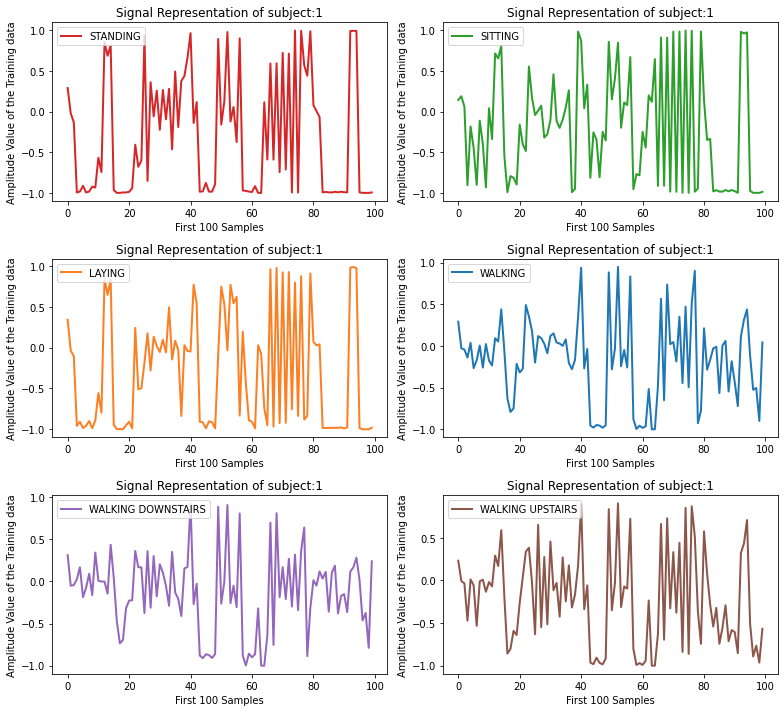

In [154]:
#Mapping signal activity data for subject:1
x_train_1=np.array(train_df.iloc[:,:561])
plt.figure(figsize=(11,10))
plt.title("Signal representation of User 1 for different activities")
colors = ['#D62728','#2C9F2C','#FD7F23','#1F77B4','#9467BD',
          '#8C564A','#7F7F7F','#1FBECF','#E377C2','#BCBD27']

for i, r in enumerate([0,27,65,100,145,172]):
    plt.subplot(3,2,i+1)
    plt.plot(x_train_1[r][:100], label=labels[train_df['activity'][r]], color=colors[i], linewidth=2)
    plt.xlabel('First 100 Samples')
    plt.ylabel('Amplitude Value of the Training data')
    plt.title("Signal Representation of subject:1")
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig('Activity of Training Data.png')

**Load total_acc data from training folder**

In [33]:
total_acc_X = pd.read_csv('/content/drive/My Drive/UCI-HAR Dataset /train/Inertial Signals/total_acc_x_train.txt', header=None, delim_whitespace=True)
total_acc_Y = pd.read_csv('/content/drive/My Drive/UCI-HAR Dataset /train/Inertial Signals/total_acc_y_train.txt', header=None, delim_whitespace=True)
total_acc_Z = pd.read_csv('/content/drive/My Drive/UCI-HAR Dataset /train/Inertial Signals/total_acc_z_train.txt', header=None, delim_whitespace=True)
train_acc_total = pd.concat([total_acc_X, total_acc_Y, total_acc_Z], axis=1)
train_acc_total["activity"] = pd.read_csv('/content/drive/My Drive/UCI-HAR Dataset /train/y_train.txt', header = None, squeeze = True)

train_acc_total["activity_name"] = label_name

#print("Training Inertial Data of total acceleromerter x,y,z:",train_acc_total.head())
print("Shape of intertial total accelerometer x,y,z data:",train_acc_total.shape)


Shape of intertial total accelerometer x,y,z data: (7352, 386)


**Different Activities of User 1 for total_acc_x data**


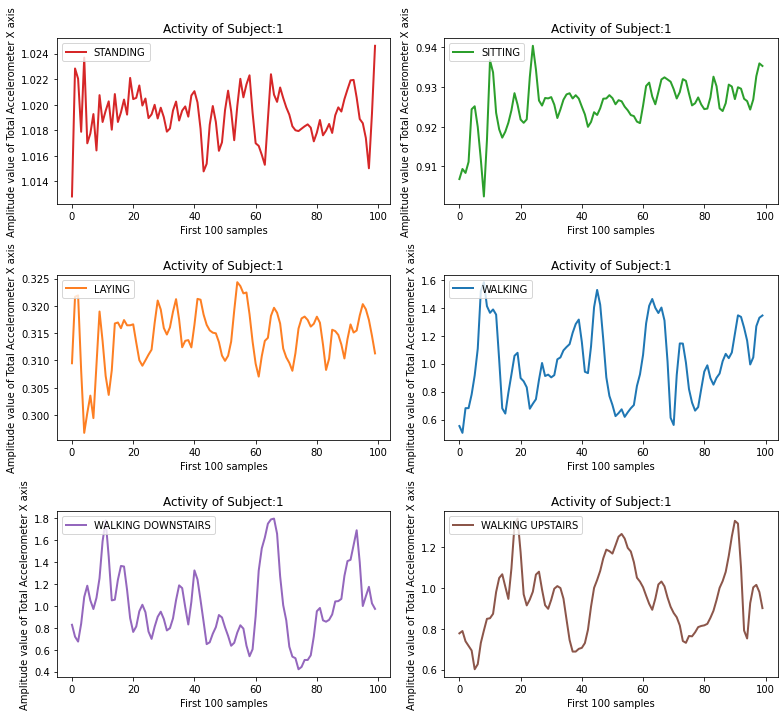

In [157]:
#Different Activity of user 1 of total_acc_X signal:
x_train_1=np.array(train_acc_total.iloc[:,:127])
plt.figure(figsize=(11,10))
colors = ['#D62728','#2C9F2C','#FD7F23','#1F77B4','#9467BD',
          '#8C564A','#7F7F7F','#1FBECF','#E377C2','#BCBD27']

for i, r in enumerate([0,27,65,100,145,172]):
  plt.subplot(3,2,i+1)
  plt.plot(x_train_1[r][:100], label=labels[train_acc_total['activity'][r]], color=colors[i], linewidth=2)
  plt.xlabel('First 100 samples')
  plt.ylabel('Amplitude value of Total Accelerometer X axis')
  plt.legend(loc='upper left')
  plt.title("Activity of Subject:1")
  plt.tight_layout()
  plt.savefig('Diff_Total_Acc_X.png')


**Similar Acitivity of user:1,3,5,6 for total_acc_X**

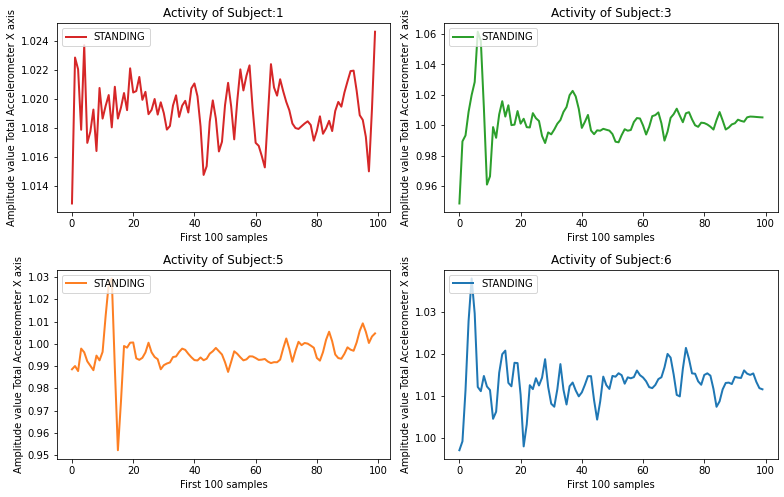

In [156]:
# Subject 1,3,5,6 Similar activity :
x_train_2=np.array(train_acc_total.iloc[:,:127])
plt.figure(figsize=(11,10))
colors = ['#D62728','#2C9F2C','#FD7F23','#1F77B4','#9467BD',
          '#8C564A','#7F7F7F','#1FBECF','#E377C2','#BCBD27']

for i, r in enumerate([0,348,689,991]):
    plt.subplot(3,2,i+1)
    plt.plot(x_train_2[r][:100], label=labels[train_acc_total['activity'][r]], color=colors[i], linewidth=2)
    plt.xlabel('First 100 samples')
    plt.ylabel('Amplitude value Total Accelerometer X axis')
    titlelists =[1, 3, 5, 6]
    plt.title("Activity of Subject:" +str(titlelists[i]))
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig('Sim_Total_Acc_X.png')

**Different Activities of User 1 for total_acc_y data**


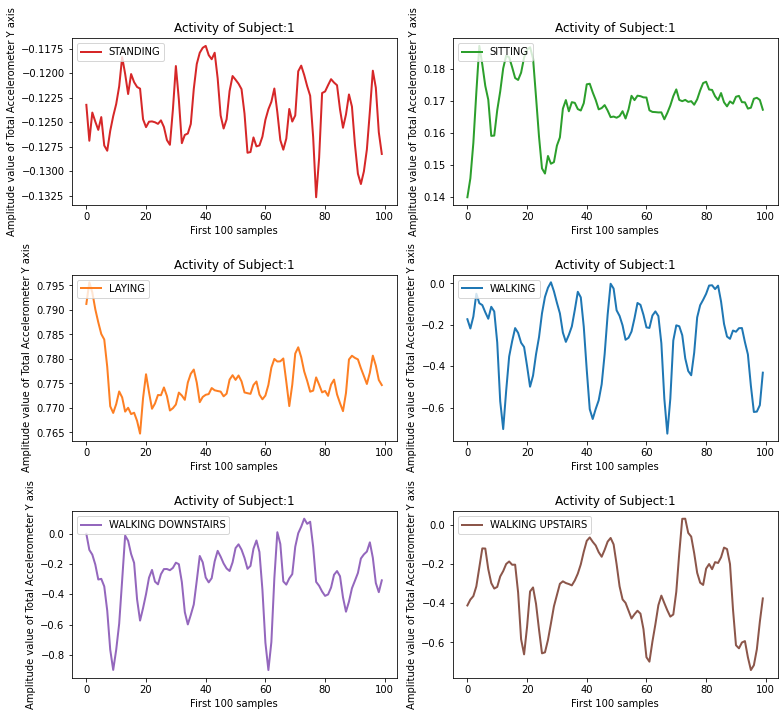

In [158]:
x_train_1=np.array(train_acc_total.iloc[:,128:255])
plt.figure(figsize=(11,10))
colors = ['#D62728','#2C9F2C','#FD7F23','#1F77B4','#9467BD',
          '#8C564A','#7F7F7F','#1FBECF','#E377C2','#BCBD27']

for i, r in enumerate([0,27,65,100,145,172]):
    plt.subplot(3,2,i+1)
    plt.plot(x_train_1[r][:100], label=labels[train_acc_total['activity'][r]], color=colors[i], linewidth=2)
    plt.xlabel('First 100 samples')
    plt.ylabel('Amplitude value of Total Accelerometer Y axis')
    plt.title('Activity of Subject:1')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig('Diff_Total_Acc_Y.png')



**Similar Acitivity of user:1,3,5,6 for total_acc_y**

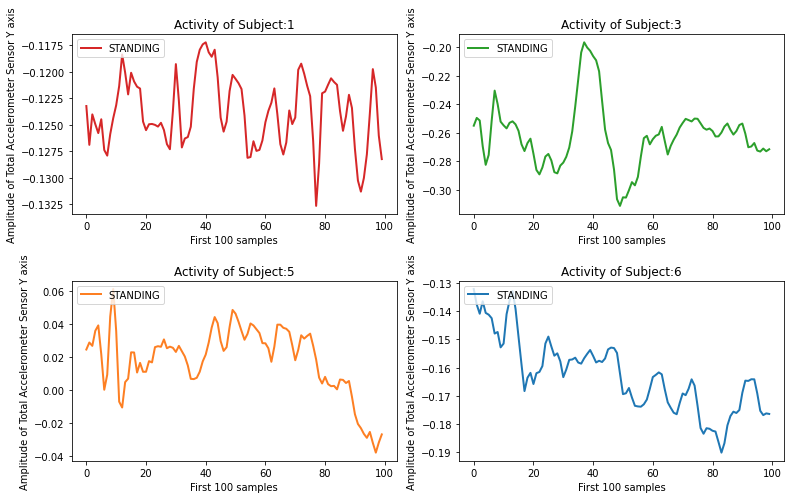

In [159]:
x_train_2=np.array(train_acc_total.iloc[:,128:255])
plt.figure(figsize=(11,10))
colors = ['#D62728','#2C9F2C','#FD7F23','#1F77B4','#9467BD',
          '#8C564A','#7F7F7F','#1FBECF','#E377C2','#BCBD27']

for i, r in enumerate([0,348,689,991]):
    plt.subplot(3,2,i+1)
    plt.plot(x_train_2[r][:100], label=labels[train_acc_total['activity'][r]], color=colors[i], linewidth=2)
    plt.xlabel('First 100 samples')
    plt.ylabel('Amplitude of Total Accelerometer Sensor Y axis')
    titlelists =[1, 3, 5, 6]
    plt.title("Activity of Subject:" +str(titlelists[i]))
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig('Sim_Total_Acc_Y.png')

**Different Activities of User 1 for total_acc_z data**


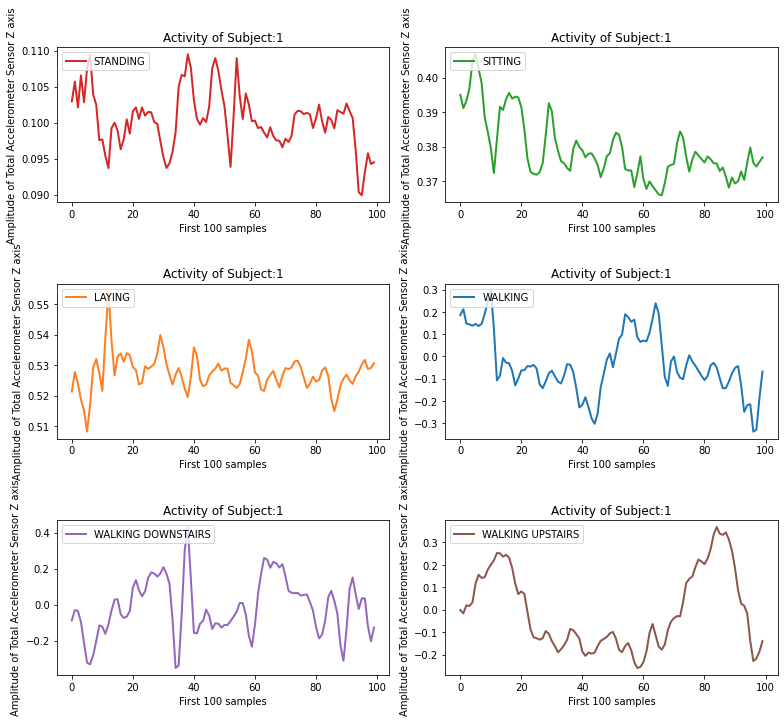

In [161]:
x_train_1=np.array(train_acc_total.iloc[:,256:384])
plt.figure(figsize=(11,10))
colors = ['#D62728','#2C9F2C','#FD7F23','#1F77B4','#9467BD',
          '#8C564A','#7F7F7F','#1FBECF','#E377C2','#BCBD27']

for i, r in enumerate([0,27,65,100,145,172]):
    plt.subplot(3,2,i+1)
    plt.plot(x_train_1[r][:100], label=labels[train_acc_total['activity'][r]], color=colors[i], linewidth=2)
    plt.xlabel('First 100 samples')
    plt.ylabel('Amplitude of Total Accelerometer Sensor Z axis')
    titlelists =[1, 3, 5, 6]
    plt.title("Activity of Subject:1")
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig('Diff_Total_Acc_Z.png')



**Similar Activity of User:1,3,5,6 for total_acc_z**

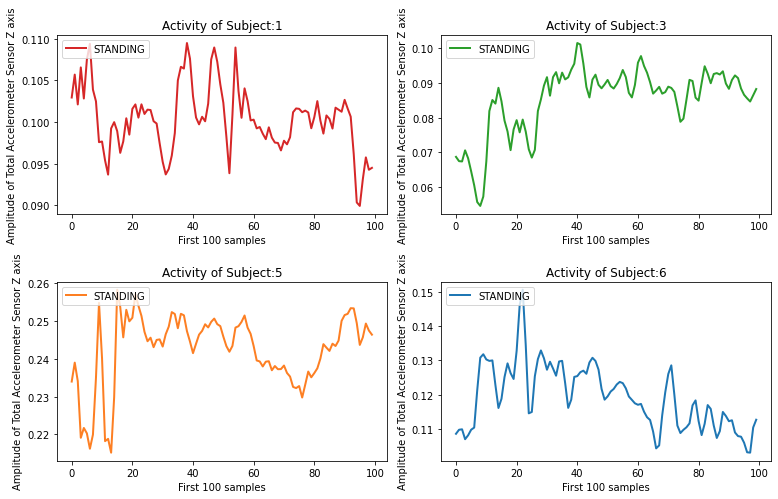

In [162]:
x_train_2=np.array(train_acc_total.iloc[:,256:384])
plt.figure(figsize=(11,10))
colors = ['#D62728','#2C9F2C','#FD7F23','#1F77B4','#9467BD',
          '#8C564A','#7F7F7F','#1FBECF','#E377C2','#BCBD27']

for i, r in enumerate([0,348,689,991]):
    plt.subplot(3,2,i+1)
    plt.plot(x_train_2[r][:100], label=labels[train_acc_total['activity'][r]], color=colors[i], linewidth=2)
    plt.xlabel('First 100 samples')
    plt.ylabel('Amplitude of Total Accelerometer Sensor Z axis')
    titlelists =[1, 3, 5, 6]
    plt.title("Activity of Subject:" +str(titlelists[i]))
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig('Sim_Total_Acc_Z.png')

**Load body_acc data**

In [92]:
body_acc_X = pd.read_csv('/content/drive/My Drive/UCI-HAR Dataset /train/Inertial Signals/body_acc_x_train.txt', header=None, delim_whitespace=True)
body_acc_Y = pd.read_csv('/content/drive/My Drive/UCI-HAR Dataset /train/Inertial Signals/body_acc_y_train.txt', header=None, delim_whitespace=True)
body_acc_Z = pd.read_csv('/content/drive/My Drive/UCI-HAR Dataset /train/Inertial Signals/body_acc_z_train.txt', header=None, delim_whitespace=True)
body_acc_total = pd.concat([body_acc_X, body_acc_Y, body_acc_Z], axis=1)
body_acc_total["activity"] = pd.read_csv('/content/drive/My Drive/UCI-HAR Dataset /train/y_train.txt', header = None, squeeze = True)

body_acc_total["activity_name"] = label_name

print("Shape of Body Accelerometer Data",body_acc_total.shape)



Shape of Body Accelerometer Data (7352, 386)


**Different Activity of user 1 for body_acc_x**

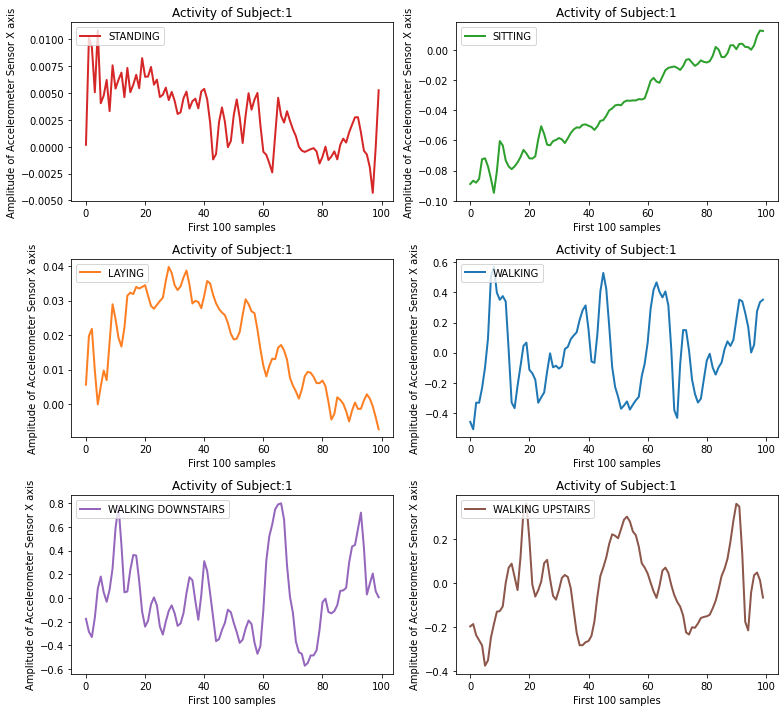

In [163]:
x_train_1=np.array(body_acc_total.iloc[:,:127])
plt.figure(figsize=(11,10))
colors = ['#D62728','#2C9F2C','#FD7F23','#1F77B4','#9467BD',
          '#8C564A','#7F7F7F','#1FBECF','#E377C2','#BCBD27']

for i, r in enumerate([0,27,65,100,145,172]):
    plt.subplot(3,2,i+1)
    plt.plot(x_train_1[r][:100], label=labels[body_acc_total['activity'][r]], color=colors[i], linewidth=2)
    plt.xlabel('First 100 samples')
    plt.ylabel('Amplitude of Accelerometer Sensor X axis')
    titlelists =[1, 3, 5, 6]
    plt.title("Activity of Subject:1")
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig('Diff_Acc_X.png')

**Similar acitvity of user:1,3,5,6 for body_acc_x**

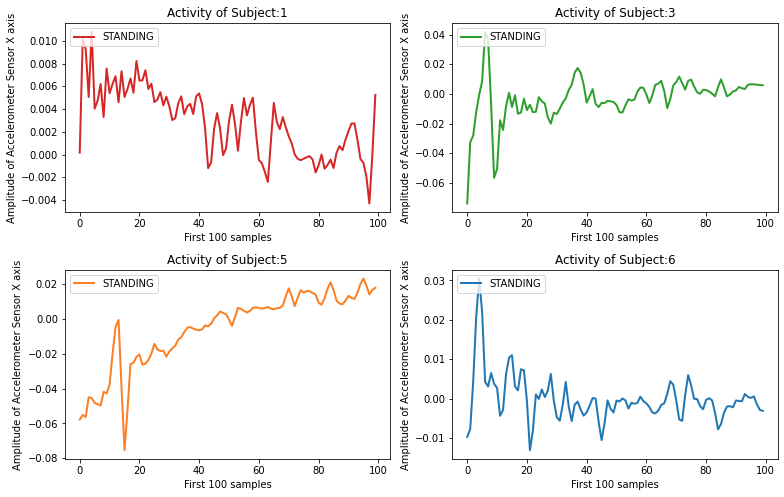

In [164]:
x_train_2=np.array(body_acc_total.iloc[:,:127])
plt.figure(figsize=(11,10))
colors = ['#D62728','#2C9F2C','#FD7F23','#1F77B4','#9467BD',
          '#8C564A','#7F7F7F','#1FBECF','#E377C2','#BCBD27']

for i, r in enumerate([0,348,689,991]):
    plt.subplot(3,2,i+1)
    plt.plot(x_train_2[r][:100], label=labels[body_acc_total['activity'][r]], color=colors[i], linewidth=2)
    plt.xlabel('First 100 samples')
    plt.ylabel('Amplitude of Accelerometer Sensor X axis')
    titlelists =[1, 3, 5, 6]
    plt.title("Activity of Subject:" +str(titlelists[i]))
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig('Sim_Acc_X.png')

**Different activtiy of user 1 for body_acc_y data**

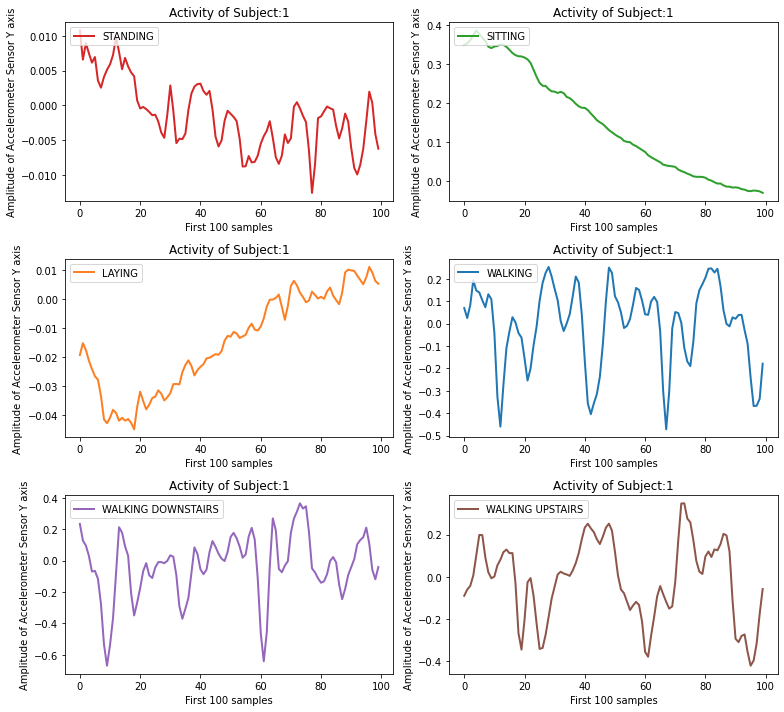

In [165]:
x_train_1=np.array(body_acc_total.iloc[:,128:255])
plt.figure(figsize=(11,10))
colors = ['#D62728','#2C9F2C','#FD7F23','#1F77B4','#9467BD',
          '#8C564A','#7F7F7F','#1FBECF','#E377C2','#BCBD27']

for i, r in enumerate([0,27,65,100,145,172]):
    plt.subplot(3,2,i+1)
    plt.plot(x_train_1[r][:100], label=labels[body_acc_total['activity'][r]], color=colors[i], linewidth=2)
    plt.xlabel('First 100 samples')
    plt.ylabel('Amplitude of Accelerometer Sensor Y axis')
    titlelists =[1, 3, 5, 6]
    plt.title("Activity of Subject:1")
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig('Diff_Acc_Y.png')


**Similar acitvity of user:1,3,5,6 for body_acc_y**

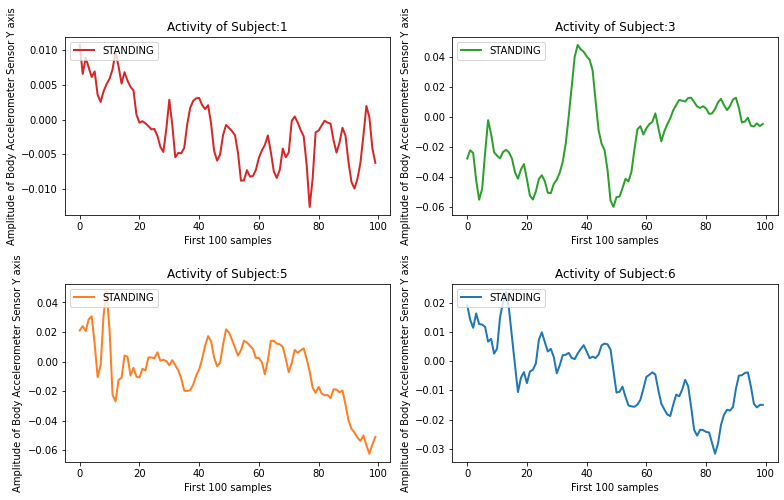

In [166]:

x_train_2=np.array(body_acc_total.iloc[:,128:255])
plt.figure(figsize=(11,10))
colors = ['#D62728','#2C9F2C','#FD7F23','#1F77B4','#9467BD',
          '#8C564A','#7F7F7F','#1FBECF','#E377C2','#BCBD27']

for i, r in enumerate([0,348,689,991]):
    plt.subplot(3,2,i+1)
    plt.plot(x_train_2[r][:100], label=labels[body_acc_total['activity'][r]], color=colors[i], linewidth=2)
    plt.xlabel('First 100 samples')
    plt.ylabel('Amplitude of Body Accelerometer Sensor Y axis')
    titlelists =[1, 3, 5, 6]
    plt.title("Activity of Subject:" +str(titlelists[i]))
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig('Sim_Acc_y.png')

**Different activtiy of user 1 for body_acc_z data**

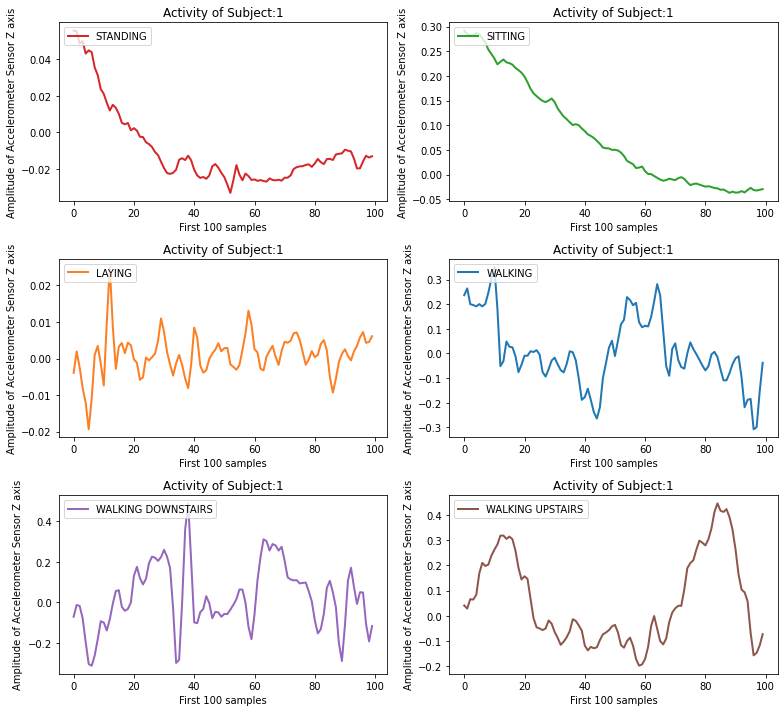

In [167]:
x_train_1=np.array(body_acc_total.iloc[:,256:384])
plt.figure(figsize=(11,10))
colors = ['#D62728','#2C9F2C','#FD7F23','#1F77B4','#9467BD',
          '#8C564A','#7F7F7F','#1FBECF','#E377C2','#BCBD27']

for i, r in enumerate([0,27,65,100,145,172]):
    plt.subplot(3,2,i+1)
    plt.plot(x_train_1[r][:100], label=labels[body_acc_total['activity'][r]], color=colors[i], linewidth=2)
    plt.xlabel('First 100 samples')
    plt.ylabel('Amplitude of Accelerometer Sensor Z axis')
    titlelists =[1, 3, 5, 6]
    plt.title("Activity of Subject:1")
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig('Diff_Acc_Z.png')



**Similar acitvity of user:1,3,5,6 for body_acc_z**

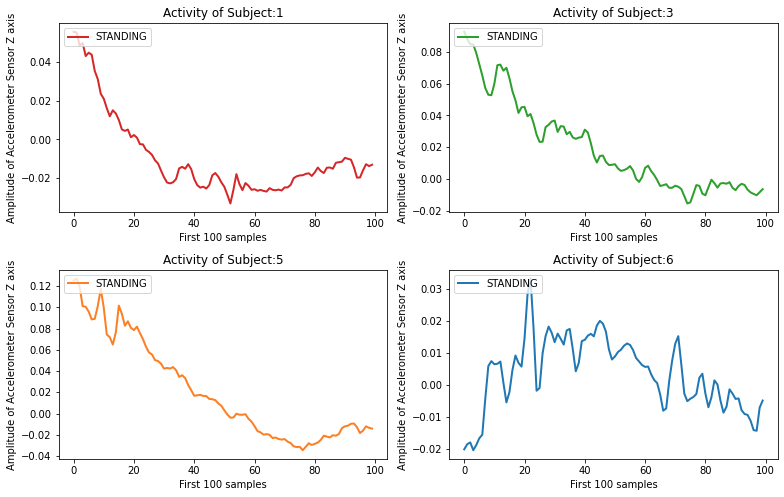

In [168]:
x_train_2=np.array(body_acc_total.iloc[:,256:384])
plt.figure(figsize=(11,10))
colors = ['#D62728','#2C9F2C','#FD7F23','#1F77B4','#9467BD',
          '#8C564A','#7F7F7F','#1FBECF','#E377C2','#BCBD27']

for i, r in enumerate([0,348,689,991]):
    plt.subplot(3,2,i+1)
    plt.plot(x_train_2[r][:100], label=labels[body_acc_total['activity'][r]], color=colors[i], linewidth=2)
    plt.xlabel('First 100 samples')
    plt.ylabel('Amplitude of Accelerometer Sensor Z axis')
    titlelists =[1, 3, 5, 6]
    plt.title("Activity of Subject:" +str(titlelists[i]))
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig('Sim_Acc_Z.png')

**Load body_gyro dataset**

In [103]:
body_gyro_X = pd.read_csv('/content/drive/My Drive/UCI-HAR Dataset /train/Inertial Signals/body_gyro_x_train.txt', header=None, delim_whitespace=True)
body_gyro_Y = pd.read_csv('/content/drive/My Drive/UCI-HAR Dataset /train/Inertial Signals/body_acc_y_train.txt', header=None, delim_whitespace=True)
body_gyro_Z = pd.read_csv('/content/drive/My Drive/UCI-HAR Dataset /train/Inertial Signals/body_gyro_z_train.txt', header=None, delim_whitespace=True)
body_gyro_total = pd.concat([body_gyro_X, body_gyro_Y, body_gyro_Z], axis=1)
body_gyro_total["activity"] = pd.read_csv('/content/drive/My Drive/UCI-HAR Dataset /train/y_train.txt', header = None, squeeze = True)
body_gyro_total["subject_id"] = pd.read_csv('/content/drive/My Drive/UCI-HAR Dataset /train/subject_train.txt', header = None, squeeze = True) #squeeze = True will 
#return data in pandas series format

body_gyro_total["activity_name"] = label_name

print('Shape of Body Gyro Sensor',body_gyro_total.shape)



Shape of Body Gyro Sensor (7352, 387)


**Different activtiy of user 1 for body_acc_x data**

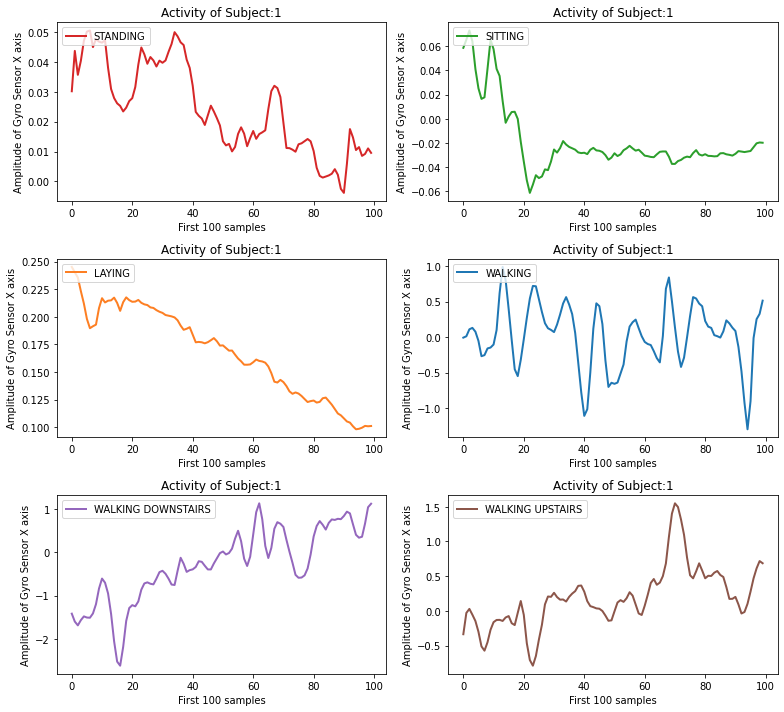

In [169]:
x_train_1=np.array(body_gyro_total.iloc[:,:127])
plt.figure(figsize=(11,10))
colors = ['#D62728','#2C9F2C','#FD7F23','#1F77B4','#9467BD',
          '#8C564A','#7F7F7F','#1FBECF','#E377C2','#BCBD27']

for i, r in enumerate([0,27,65,100,145,172]):
    plt.subplot(3,2,i+1)
    plt.plot(x_train_1[r][:100], label=labels[body_gyro_total['activity'][r]], color=colors[i], linewidth=2)
    plt.xlabel('First 100 samples')
    plt.ylabel('Amplitude of Gyro Sensor X axis')
    titlelists =[1, 3, 5, 6]
    plt.title("Activity of Subject:1")
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig('Diff_Gyro_X.png')



**Similar acitvity of user:1,3,5,6 for body_acc_x**

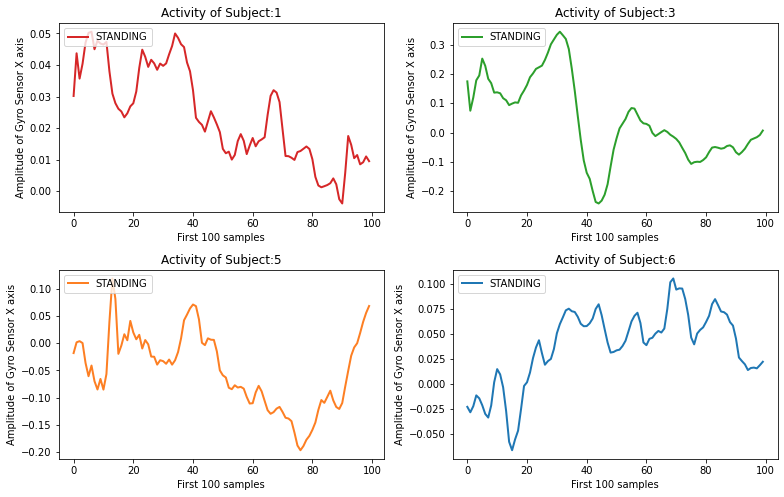

In [170]:
x_train_2=np.array(body_gyro_total.iloc[:,:127])
plt.figure(figsize=(11,10))
colors = ['#D62728','#2C9F2C','#FD7F23','#1F77B4','#9467BD',
          '#8C564A','#7F7F7F','#1FBECF','#E377C2','#BCBD27']

for i, r in enumerate([0,348,689,991]):
    plt.subplot(3,2,i+1)
    plt.plot(x_train_2[r][:100], label=labels[body_gyro_total['activity'][r]], color=colors[i], linewidth=2)
    plt.xlabel('First 100 samples')
    plt.ylabel('Amplitude of Gyro Sensor X axis')
    titlelists =[1, 3, 5, 6]
    plt.title("Activity of Subject:" +str(titlelists[i]))
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig('Sim_Gyro_X.png')

**Different activtiy of user 1 for body_acc_y data**

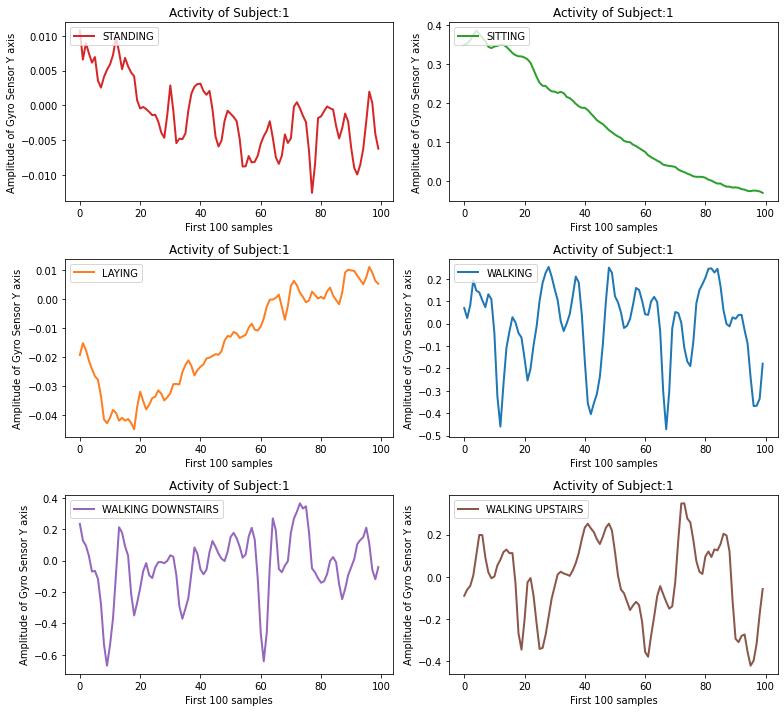

In [171]:
x_train_1=np.array(body_gyro_total.iloc[:,128:255])
plt.figure(figsize=(11,10))
colors = ['#D62728','#2C9F2C','#FD7F23','#1F77B4','#9467BD',
          '#8C564A','#7F7F7F','#1FBECF','#E377C2','#BCBD27']

for i, r in enumerate([0,27,65,100,145,172]):
    plt.subplot(3,2,i+1)
    plt.plot(x_train_1[r][:100], label=labels[body_gyro_total['activity'][r]], color=colors[i], linewidth=2)
    plt.xlabel('First 100 samples')
    plt.ylabel('Amplitude of Gyro Sensor Y axis')
    titlelists =[1, 3, 5, 6]
    plt.title("Activity of Subject:1")
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig('Diff_Gyro_Y.png')
  

**Similar acitvity of user:1,3,5,6 for body_acc_y**

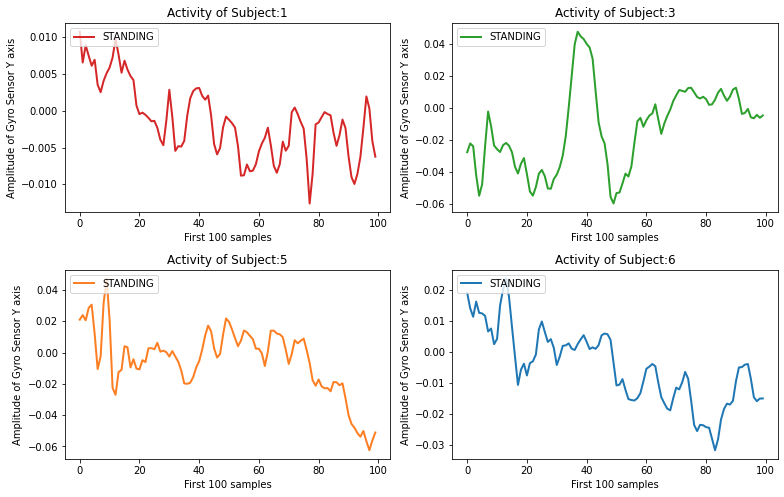

In [172]:
  
x_train_2=np.array(body_gyro_total.iloc[:,128:256])
plt.figure(figsize=(11,10))
colors = ['#D62728','#2C9F2C','#FD7F23','#1F77B4','#9467BD',
          '#8C564A','#7F7F7F','#1FBECF','#E377C2','#BCBD27']

for i, r in enumerate([0,348,689,991]):
    plt.subplot(3,2,i+1)
    plt.plot(x_train_2[r][:100], label=labels[body_gyro_total['activity'][r]], color=colors[i], linewidth=2)
    plt.xlabel('First 100 samples')
    plt.ylabel('Amplitude of Gyro Sensor Y axis')
    titlelists =[1, 3, 5, 6]
    plt.title("Activity of Subject:" +str(titlelists[i]))
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig('Sim_Gyro_Y.png')

**Different activtiy of user 1 for body_acc_z data**

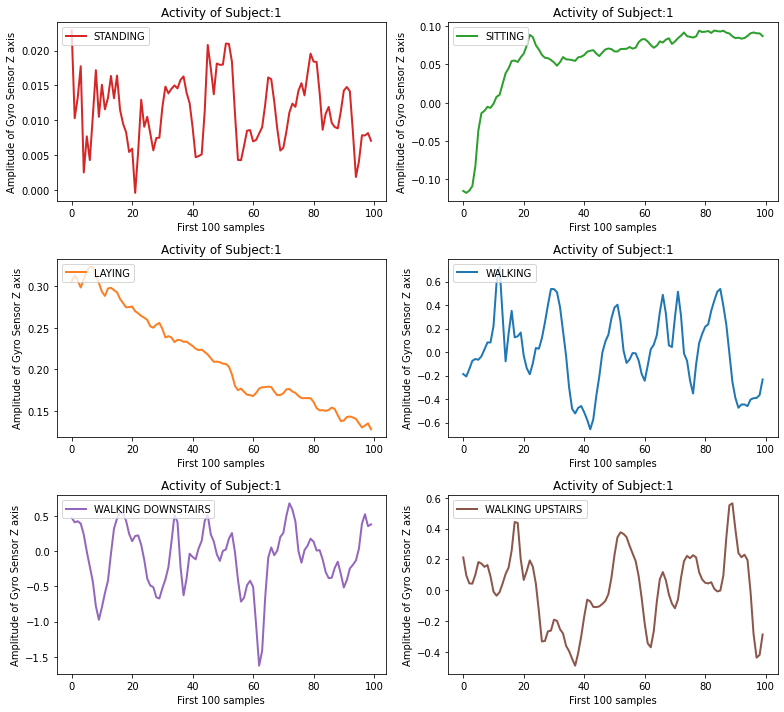

In [173]:
x_train_1=np.array(body_gyro_total.iloc[:,256:384])
plt.figure(figsize=(11,10))
colors = ['#D62728','#2C9F2C','#FD7F23','#1F77B4','#9467BD',
          '#8C564A','#7F7F7F','#1FBECF','#E377C2','#BCBD27']

for i, r in enumerate([0,27,65,100,145,172]):
    plt.subplot(3,2,i+1)
    plt.plot(x_train_1[r][:100], label=labels[body_gyro_total['activity'][r]], color=colors[i], linewidth=2)
    plt.xlabel('First 100 samples')
    plt.ylabel('Amplitude of Gyro Sensor Z axis')
    titlelists =[1, 3, 5, 6]
    plt.title("Activity of Subject:1" )
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig('Diff_Gyro_Z.png')



**Similar acitvity of user:1,3,5,6 for body_acc_z**

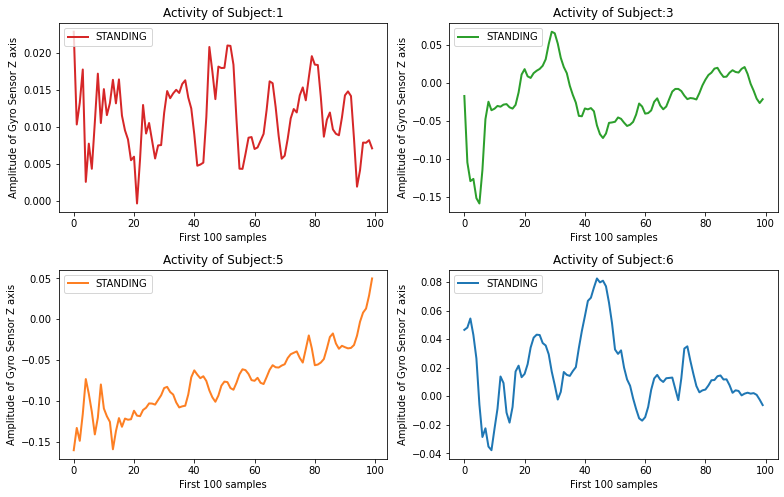

In [174]:
x_train_2=np.array(body_gyro_total.iloc[:,256:384])
plt.figure(figsize=(11,10))
colors = ['#D62728','#2C9F2C','#FD7F23','#1F77B4','#9467BD',
          '#8C564A','#7F7F7F','#1FBECF','#E377C2','#BCBD27']

for i, r in enumerate([0,348,689,991]):
    plt.subplot(3,2,i+1)
    plt.plot(x_train_2[r][:100], label=labels[body_gyro_total['activity'][r]], color=colors[i], linewidth=2)
    plt.xlabel('First 100 samples')
    plt.ylabel('Amplitude of Gyro Sensor Z axis')
    titlelists =[1, 3, 5, 6]
    plt.title("Activity of Subject:" +str(titlelists[i]))
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.savefig('Sim_Gyro_Z.png')